In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [8]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


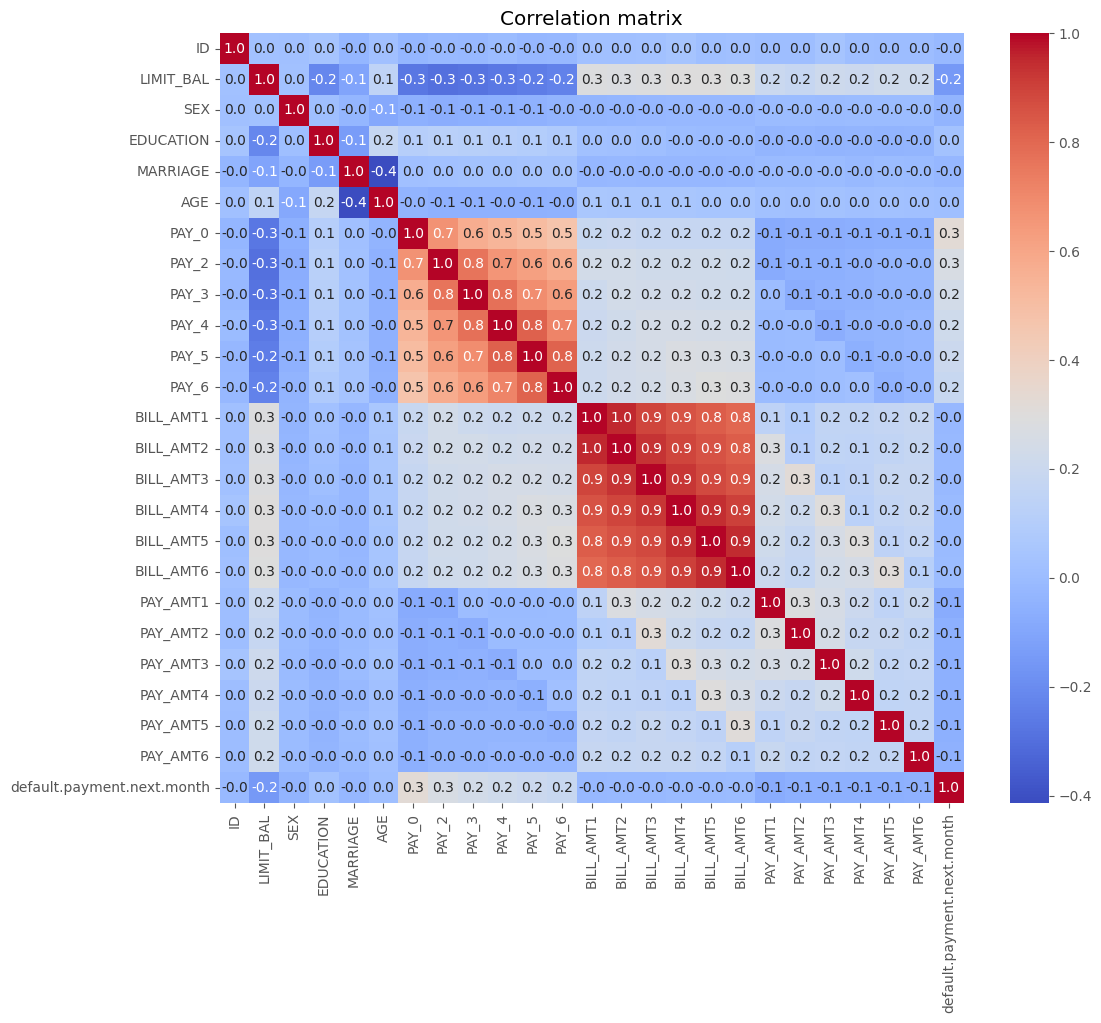

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

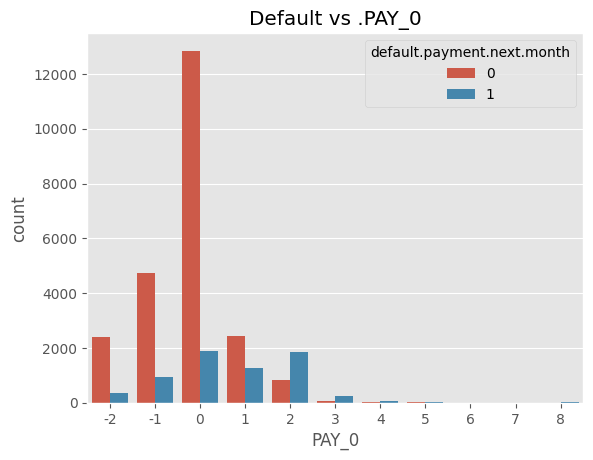

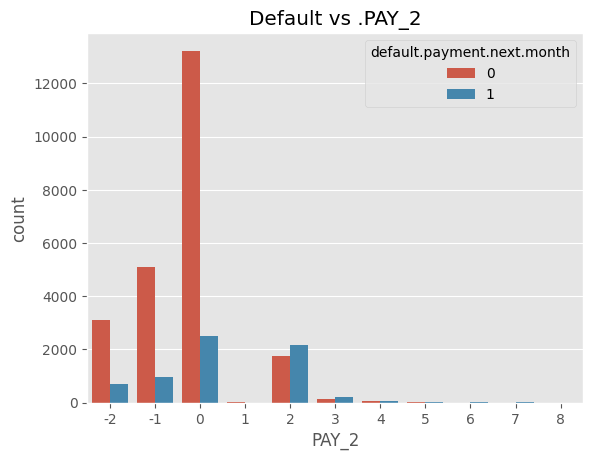

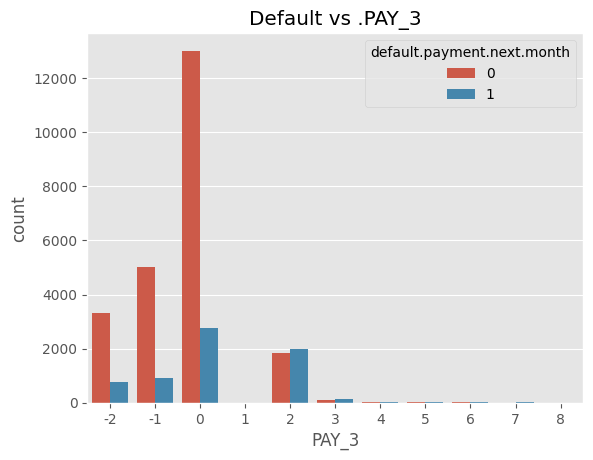

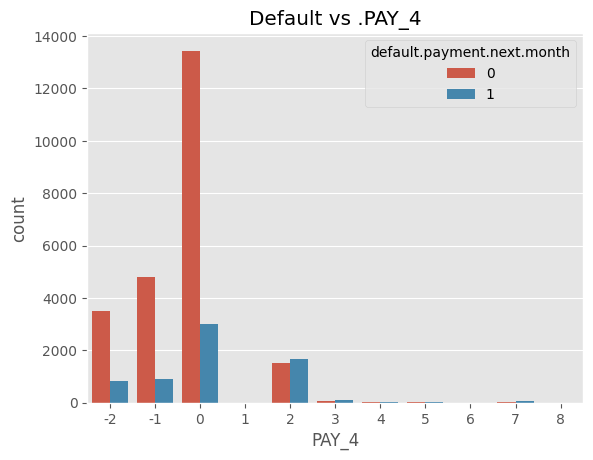

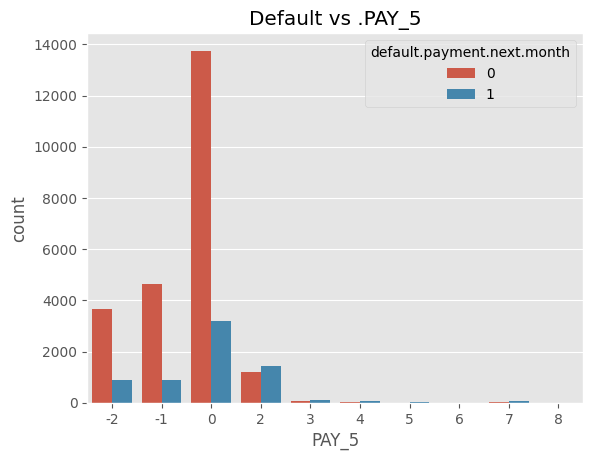

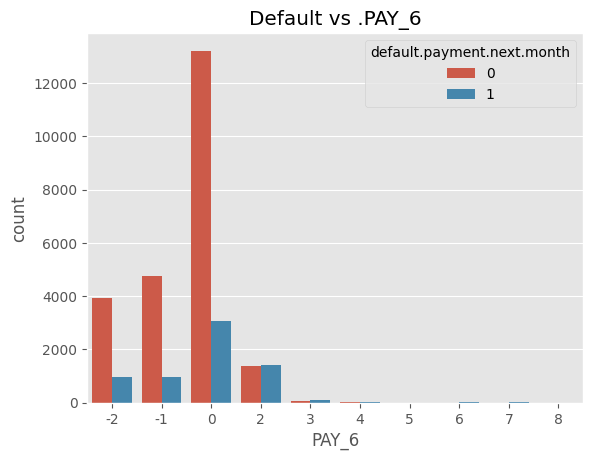

In [10]:
payment_history_columns=['PAY_0',"PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for col in payment_history_columns:
    sns.countplot(x=col,hue='default.payment.next.month',data=df)
    plt.title(f"Default vs .{col }")
    plt.show()

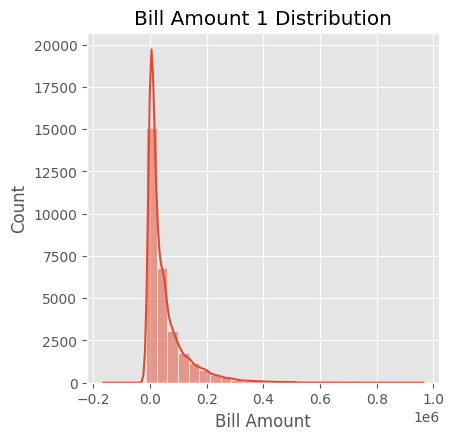

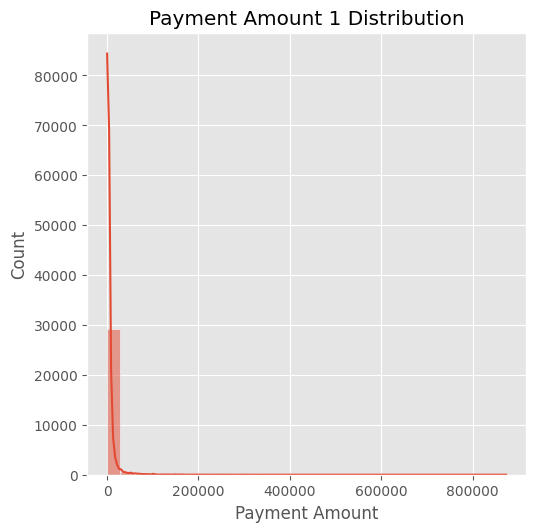

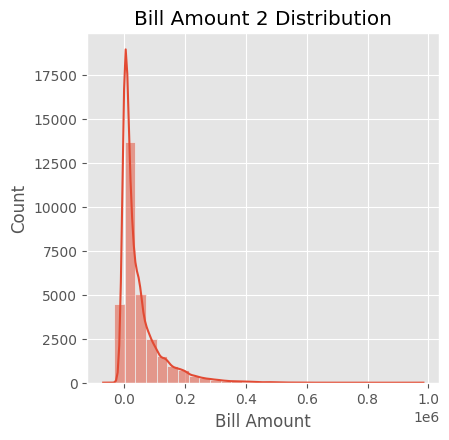

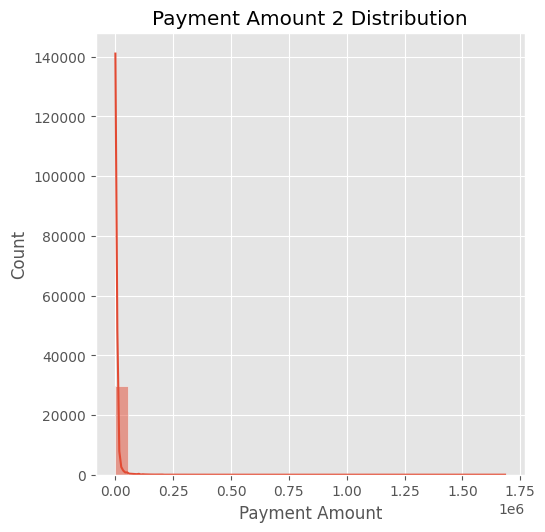

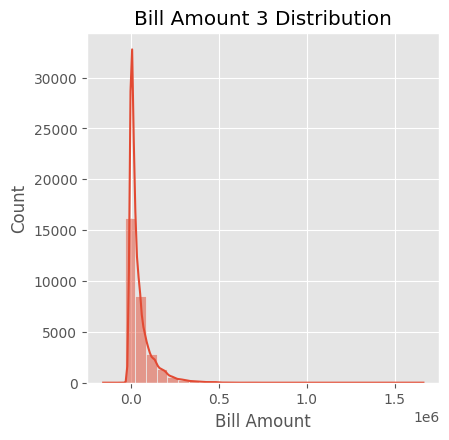

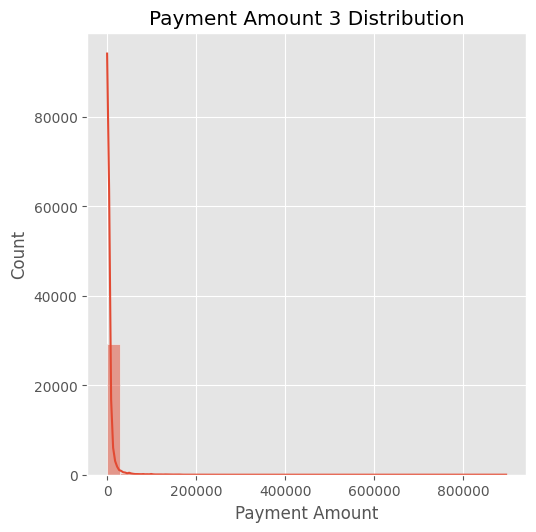

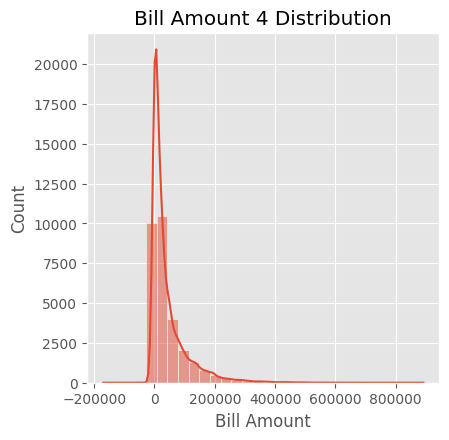

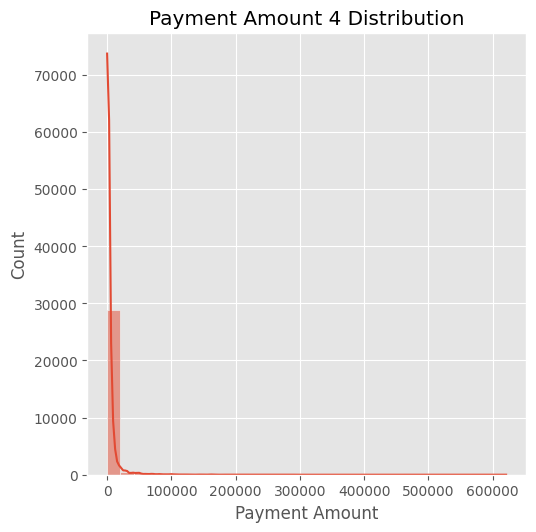

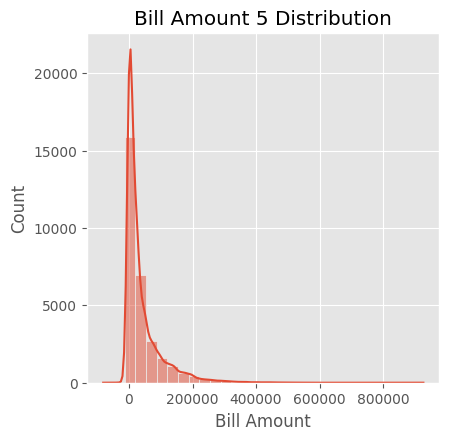

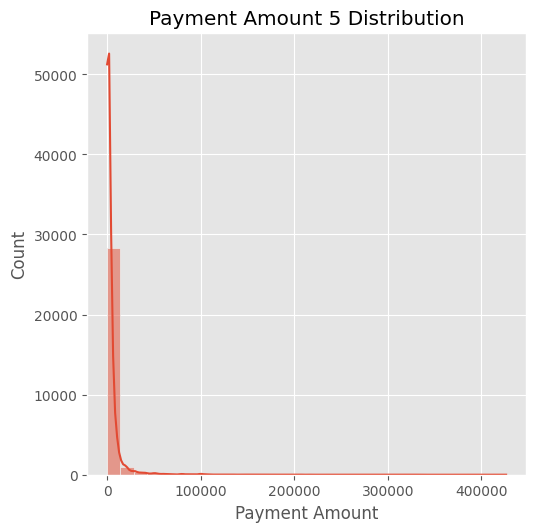

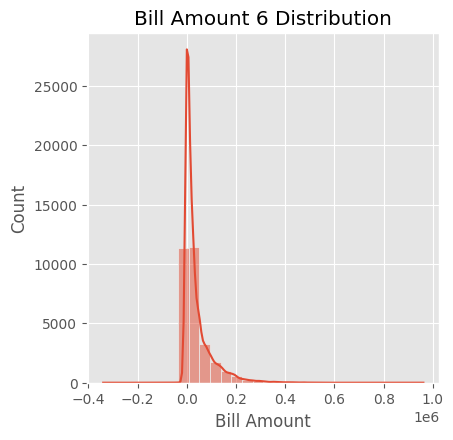

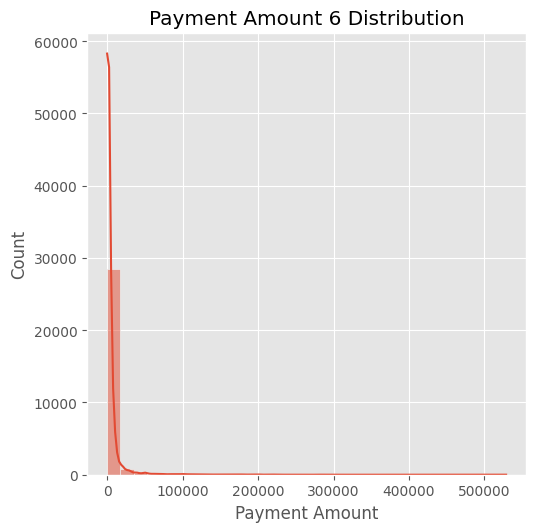

In [11]:
for i in range(1,7):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.histplot(df[f'BILL_AMT{i}'],bins=30,kde=True)
    plt.title(f"Bill Amount {i} Distribution")
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,2)
    sns.histplot(df[f'PAY_AMT{i}'],bins=30,kde=True)
    plt.title(f"Payment Amount {i} Distribution")
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

Text(0.5, 0, 'Default payment')

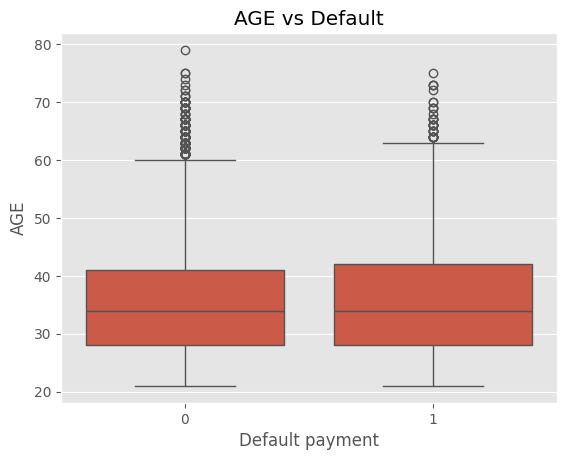

In [12]:
sns.boxplot(x='default.payment.next.month', y='AGE', data=df)
plt.title("AGE vs Default")
plt.xlabel("Default payment")

C:\Users\Soumaya\AppData\Local\Temp\ipykernel_9076\3224280722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'],kde=True,bins=200,color="blue")


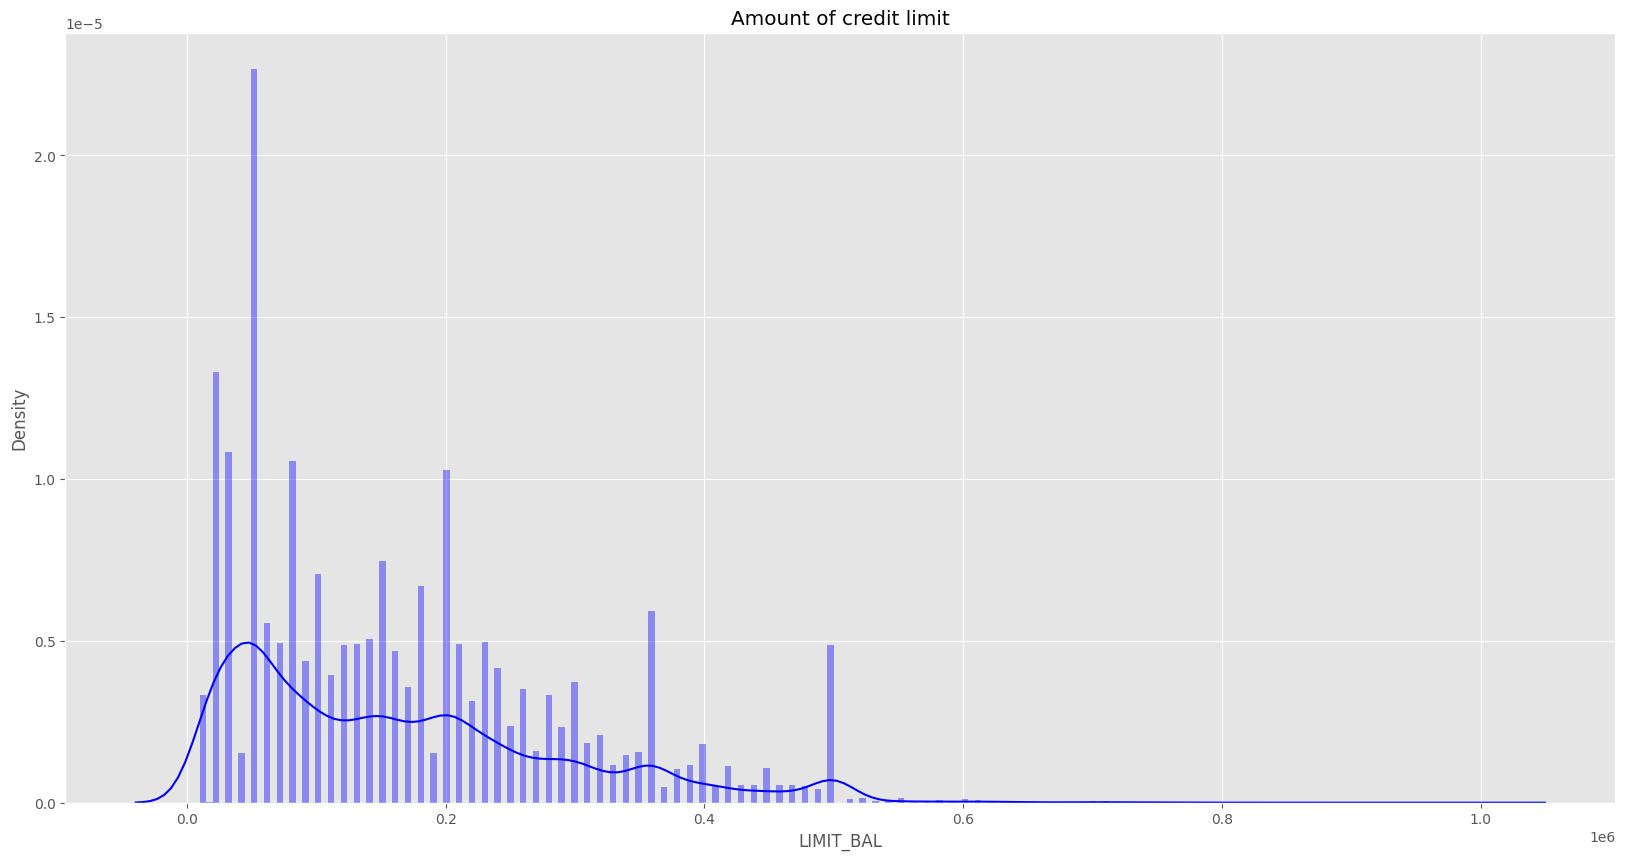

In [13]:
plt.figure(figsize=(20,10))
plt.title('Amount of credit limit')
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200,color="blue")
plt.show()

In [14]:
df['LIMIT_BAL'].value_counts().head(5)

LIMIT_BAL
50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: count, dtype: int64

C:\Users\Soumaya\AppData\Local\Temp\ipykernel_9076\639551367.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1,kde=True,bins=200,color='red')
C:\Users\Soumaya\AppData\Local\Temp\ipykernel_9076\639551367.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200,color

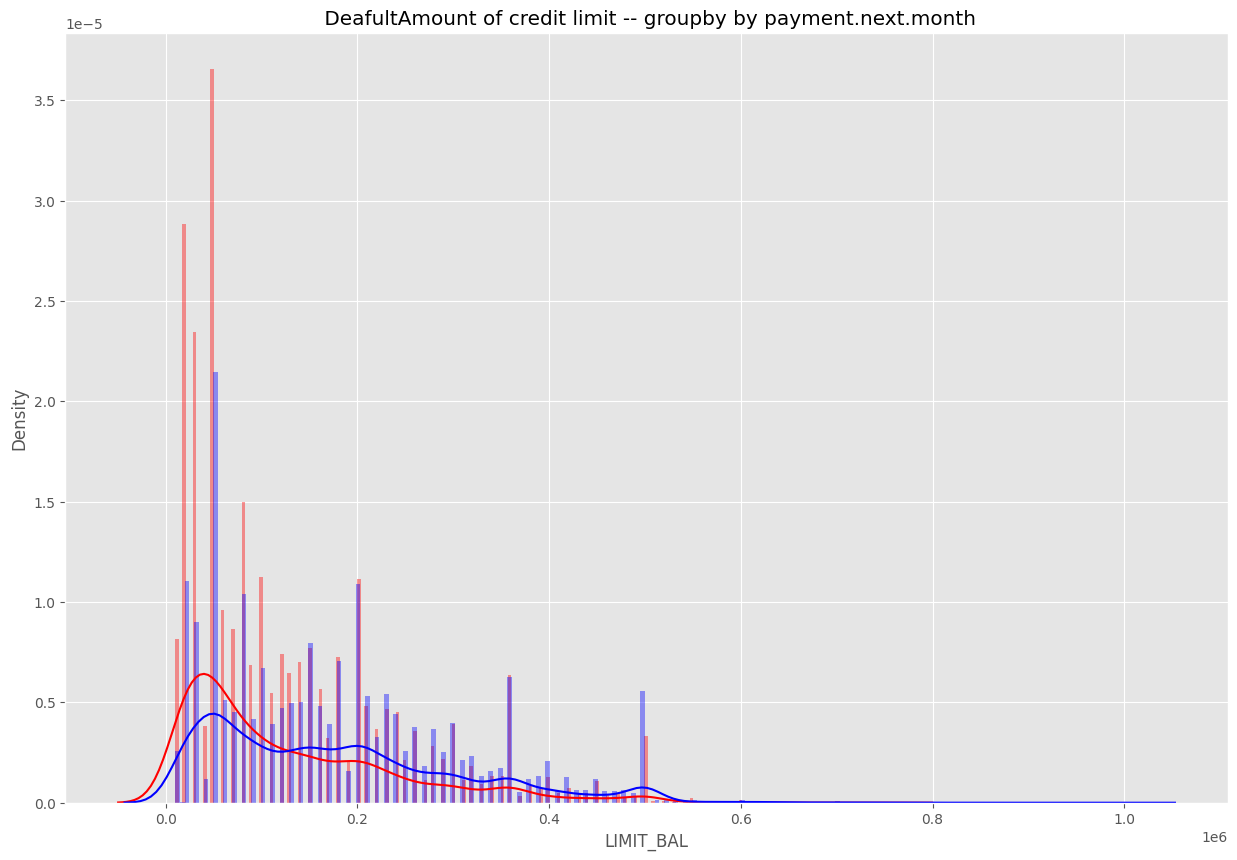

In [15]:
class_0=df.loc[df['default.payment.next.month']==0]['LIMIT_BAL']
class_1=df.loc[df['default.payment.next.month']==1]['LIMIT_BAL']

plt.figure(figsize=(15,10))
plt.title(" DeafultAmount of credit limit -- groupby by payment.next.month")
sns.distplot(class_1,kde=True,bins=200,color='red')
sns.distplot(class_0,kde=True,bins=200,color='blue')
plt.show()

In [16]:
df=df.drop("ID",axis='columns')

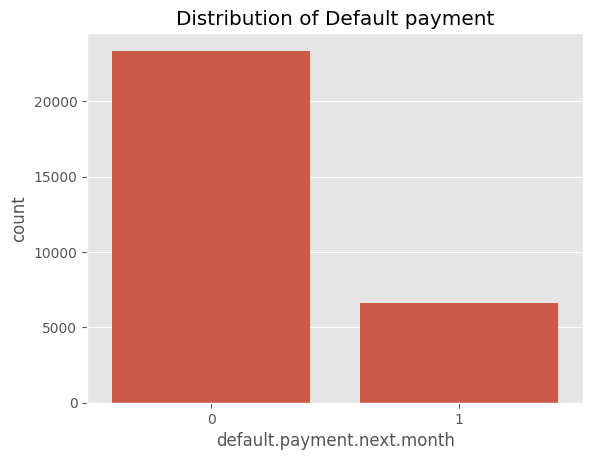

In [17]:
sns.countplot(x='default.payment.next.month',data=df)
plt.title("Distribution of Default payment")
plt.show()

Text(0.5, 1.0, 'Age distribution')

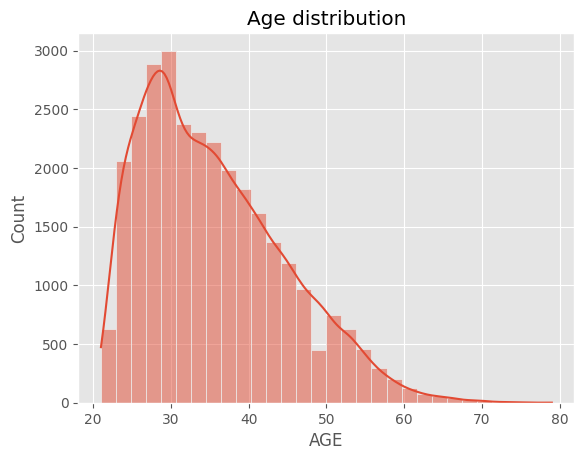

In [18]:
sns.histplot(df['AGE'],bins=30,kde=True)
plt.title("Age distribution")

<Axes: >

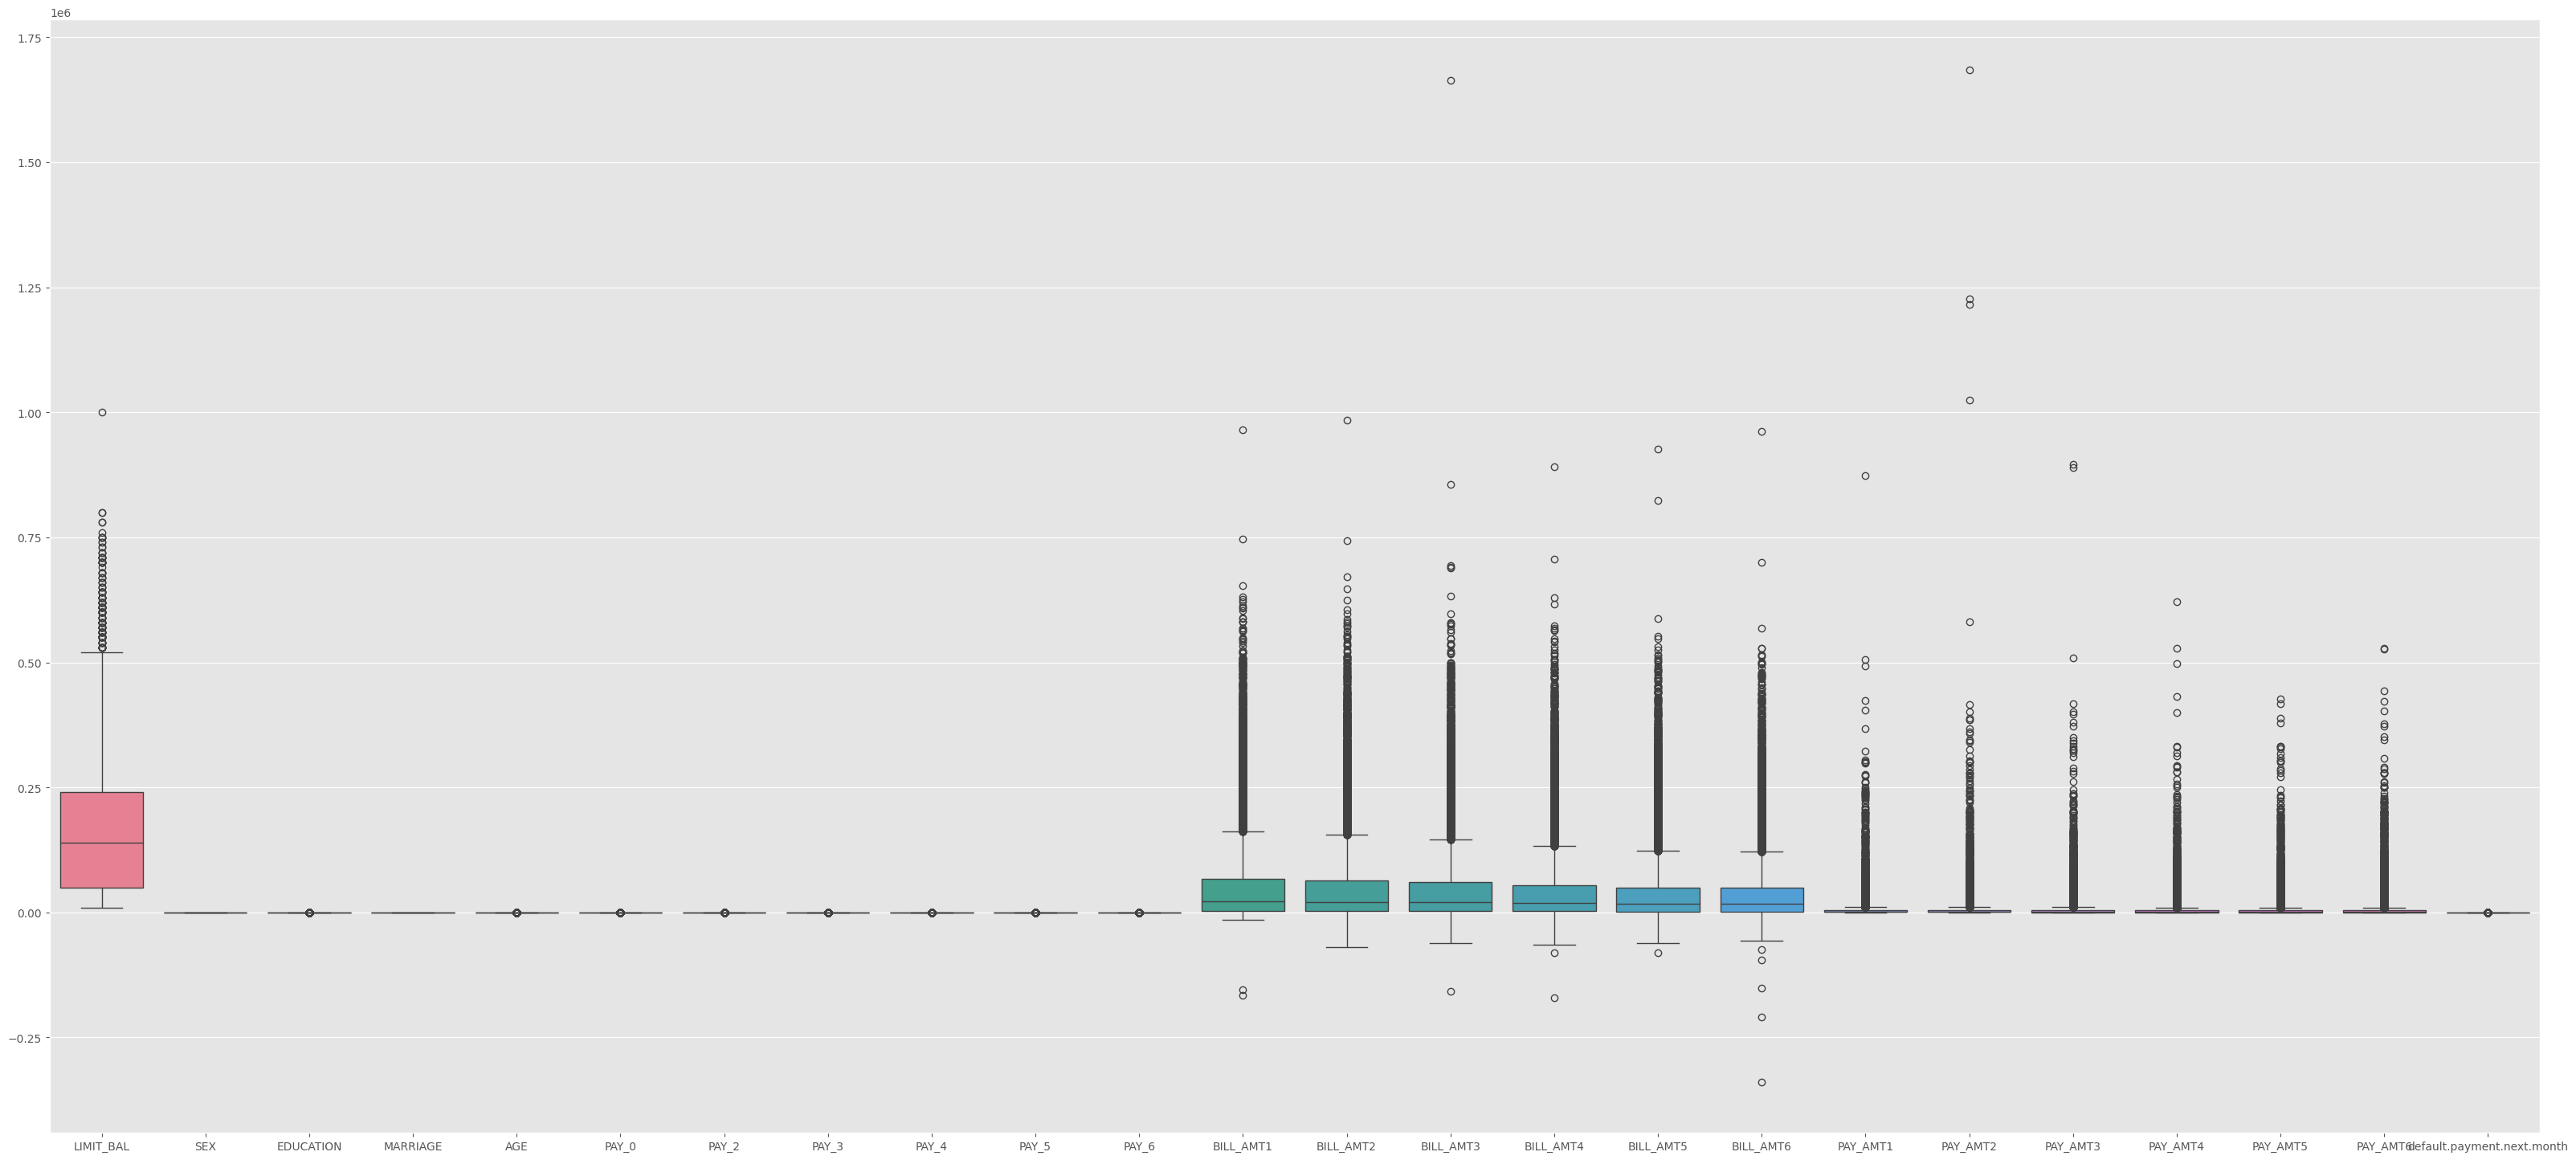

In [19]:
plt.figure(figsize=(40,18))
sns.boxplot(data=df)

In [20]:
x=df.drop(columns="default.payment.next.month",axis=1)
y=df["default.payment.next.month"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [23]:
lr=LogisticRegression()
lr.fit(x_trained_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [28]:
features_importance=pd.Series(lr.coef_[0],index=x.columns)
features_importance=features_importance.abs().sort_values(ascending=False)
print(features_importance)

PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [29]:
import pickle
pickle.dump(lr,open("model.pkl",'wb'))